# Direct Analysis Response to Our CEO's Queries.

Dear Mr. CEO,

Thank you for reaching out with these queries. I've put together this notebook to provide detailed answers to each of your questions in a structured and transparent manner. 

## Breakdown of This Notebook:
1. **Bryant Park Analysis**
    - I'll be checking the number of data rows for Bryant Park and determining if there's a correlation with it being closed on weekends.

<br>

2. **Location with Highest Sales in a Single Day**
    - I'll pinpoint which of our locations had the peak sales day and determine if there was something special about that particular day.

<br>

3. **Detailed Sales Analysis for a Particular Location**
    - I'll explore its highest sales day.
    - Additionally, I'll identify which location stood out the most on weekdays.

<br>

4. **Order Type Breakdown**
    - I'll provide insights into the percentage of orders that are deliveries at each of our restaurants.

<br>

5. **Demand Analysis for Staffing**
    - I'll visualize and explain the distribution of orders at each establishment, differentiating between weekdays and weekends.

---

Please scroll through the notebook to get in-depth responses to each point. If any clarifications or further information is required, don't hesitate to let me know.

Warm regards,
<br>
Faishal Maoludyo

*Before we begin, I will import pandas as our main library and the data needed in this report.*

In [1]:
import pandas as pd

In [2]:
df_summarized_orders = pd.read_csv('data/Summarized_orders.csv')
df_restaurants = pd.read_csv('data/Restaurants.csv')
df_orders = pd.read_csv('data/orders.csv')
df_items = pd.read_csv('data/items.csv')

## 1st Question: Bryant Park Analysis

To answer your first question, let's look up and analyze the summarized_orders file.

In [3]:
df_summarized_orders

,RESTAURANTS,DATE,NUM_ORD,PERC_DELIVERY
0,Bryant Park,2018-01-01,373,0.000000
1,Bryant Park,2018-01-02,789,0.000000
2,Bryant Park,2018-01-03,818,0.000000
3,Bryant Park,2018-01-04,782,0.000000
4,Bryant Park,2018-01-05,719,0.000000
...,...,...,...,...
2801,Williamsburg,2018-12-27,941,0.089267
2802,Williamsburg,2018-12-28,941,0.127524
2803,Williamsburg,2018-12-29,942,0.093418
2804,Williamsburg,2018-12-30,933,0.114684


In [4]:
df_summarized_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2806 entries, 0 to 2805
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   RESTAURANTS    2806 non-null   object 
 1   DATE           2806 non-null   object 
 2   NUM_ORD        2806 non-null   int64  
 3   PERC_DELIVERY  2806 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 87.8+ KB


In [5]:
df_summarized_orders.RESTAURANTS.value_counts()

RESTAURANTS
Columbia           365
Flatiron           365
Midtown            365
NYU                365
Upper West Side    365
Williamsburg       365
Upper East Side    355
Bryant Park        261
Name: count, dtype: int64

Based on this information, this is what the CEO meant by Bryan Park has 261 rows of data.

Now, we have to check whether Byran Park is closed on the weekend. But first, let's change the data format in the `DATE` column to `Datetime` so we can start analyzing the dates.

In [6]:
df_summarized_orders.DATE = pd.to_datetime(df_summarized_orders.DATE)

In [7]:
df_summarized_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2806 entries, 0 to 2805
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   RESTAURANTS    2806 non-null   object        
 1   DATE           2806 non-null   datetime64[ns]
 2   NUM_ORD        2806 non-null   int64         
 3   PERC_DELIVERY  2806 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 87.8+ KB


After the data is ready to analyze, let's create a bar chart grouped by days of the week.

<Axes: xlabel='DATE'>

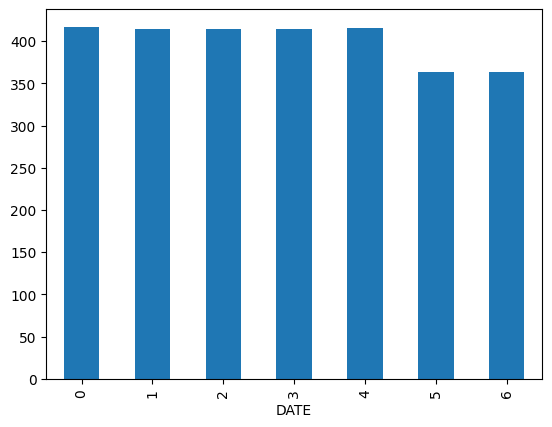

In [8]:
df_summarized_orders.DATE.dt.dayofweek.value_counts().sort_index().plot(kind='bar')

At first glance, we could see differences in the total days on Saturday (5) and Sunday (6). We could hypothesize that the differences were because Bryant Park was not open on the weekend.

To check whether the hypothesis was right, we would analyze only the data of Bryant Park. Now, let's create a new dataframe only for Bryant Park.

In [9]:
df_filtered = df_summarized_orders[df_summarized_orders.RESTAURANTS == 'Bryant Park']

<Axes: xlabel='DATE'>

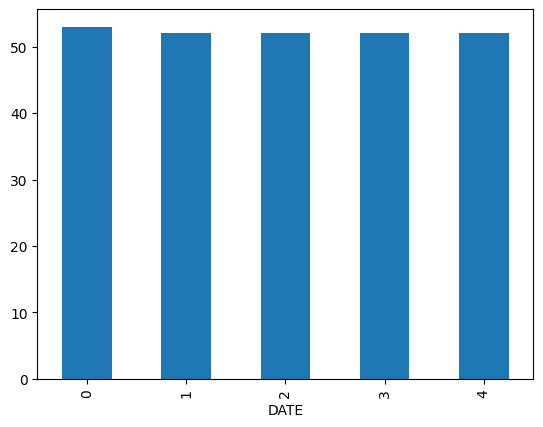

In [10]:
df_filtered.DATE.dt.dayofweek.value_counts().sort_index().plot(kind='bar')

**Answer** : based on the chart above, we could conclude that Bryant Park was not open on the weekend, as there are no data for Bryant Park on Saturday (5) and Sunday (6)

## 2nd Question : Location with Highest Sales in a Single Day

To answer this question, let's analyze the highest sales among all stores.

In [11]:
df_summarized_orders.sort_values('NUM_ORD', ascending=False)

,RESTAURANTS,DATE,NUM_ORD,PERC_DELIVERY
1530,NYU,2018-06-24,1396,0.063754
1397,NYU,2018-02-11,1381,0.099203
1406,NYU,2018-02-20,1371,0.068563
1410,NYU,2018-02-24,1361,0.085966
1683,NYU,2018-11-24,1353,0.105691
...,...,...,...,...
842,Flatiron,2018-08-05,386,0.116580
820,Flatiron,2018-07-14,374,0.117647
0,Bryant Park,2018-01-01,373,0.000000
1793,Upper East Side,2018-03-17,372,0.360215


Based on the data above, we could see that the highest number of sales occurred in NYU at 2018-06-24.

**Answer** : After doing further online research to find what was happening near NYU at 2018-06-24, we found out that there was a LGBTQ Pride march on that date. Here is the source: [LGBTQ Pride is Inclusive in New York City](https://abc7ny.com/original-originals-pride-week-nyc/3616262/). The restaurants was positively impacted by the march.

## 3rd Question: Detailed Sales Analysis for a Particular Location

I will answer this question in two parts. The first part is finding the most sales at every location, and the other part is finding what location has the most sales on the weekday. 

To answer your first part of the question. I need to group the orders based on the locations and then find the highest sales for the particular locations.

In [12]:
df_summarized_orders

,RESTAURANTS,DATE,NUM_ORD,PERC_DELIVERY
0,Bryant Park,2018-01-01,373,0.000000
1,Bryant Park,2018-01-02,789,0.000000
2,Bryant Park,2018-01-03,818,0.000000
3,Bryant Park,2018-01-04,782,0.000000
4,Bryant Park,2018-01-05,719,0.000000
...,...,...,...,...
2801,Williamsburg,2018-12-27,941,0.089267
2802,Williamsburg,2018-12-28,941,0.127524
2803,Williamsburg,2018-12-29,942,0.093418
2804,Williamsburg,2018-12-30,933,0.114684


To find the highest sales in each location, I will find the index of the highest sales first. Here are the **index** of the highest sales (not the number of sales) in every location:

In [13]:
idx = df_summarized_orders.groupby('RESTAURANTS')['NUM_ORD'].idxmax()
idx

RESTAURANTS
Bryant Park         250
Columbia            330
Flatiron            647
Midtown            1293
NYU                1530
Upper East Side    2021
Upper West Side    2383
Williamsburg       2748
Name: NUM_ORD, dtype: int64

After finding the index for the highest number of sales, let's locate the data using the `loc` function.

In [14]:
result = df_summarized_orders.loc[idx]
result

,RESTAURANTS,DATE,NUM_ORD,PERC_DELIVERY
250,Bryant Park,2018-12-17,1055,0.084360
330,Columbia,2018-03-11,833,0.080432
647,Flatiron,2018-01-22,1026,0.096491
1293,Midtown,2018-10-30,1191,0.094039
1530,NYU,2018-06-24,1396,0.063754
2021,Upper East Side,2018-11-04,999,0.127127
2383,Upper West Side,2018-11-04,1003,0.131605
2748,Williamsburg,2018-11-04,1146,0.057592


**Answer** : Based on the data above, we could see the highest number of orders for every restaurant. The highest number of orders was in NYU at 1396 orders on 2018-06-24, and the lowest was in Columbia at 833 orders on 2018-03-11.

Now, let's move on to the second part of the question. 

To answer this part, we need to create a new dataframe while filtering the data only on weekdays.

In [15]:
df_weekdays = df_summarized_orders[df_summarized_orders['DATE'].dt.weekday < 5]

In [16]:
df_weekdays

,RESTAURANTS,DATE,NUM_ORD,PERC_DELIVERY
0,Bryant Park,2018-01-01,373,0.000000
1,Bryant Park,2018-01-02,789,0.000000
2,Bryant Park,2018-01-03,818,0.000000
3,Bryant Park,2018-01-04,782,0.000000
4,Bryant Park,2018-01-05,719,0.000000
...,...,...,...,...
2799,Williamsburg,2018-12-25,933,0.094319
2800,Williamsburg,2018-12-26,942,0.100849
2801,Williamsburg,2018-12-27,941,0.089267
2802,Williamsburg,2018-12-28,941,0.127524


After droping the weekends, we can start counting the data in the table.

In [17]:
df_weekdays.groupby('RESTAURANTS')['NUM_ORD'].sum().sort_values(ascending=False)

RESTAURANTS
NYU                306664
Midtown            266121
Flatiron           230495
Bryant Park        227445
Williamsburg       224101
Upper West Side    200462
Upper East Side    194268
Columbia           178930
Name: NUM_ORD, dtype: int64

<Axes: xlabel='RESTAURANTS'>

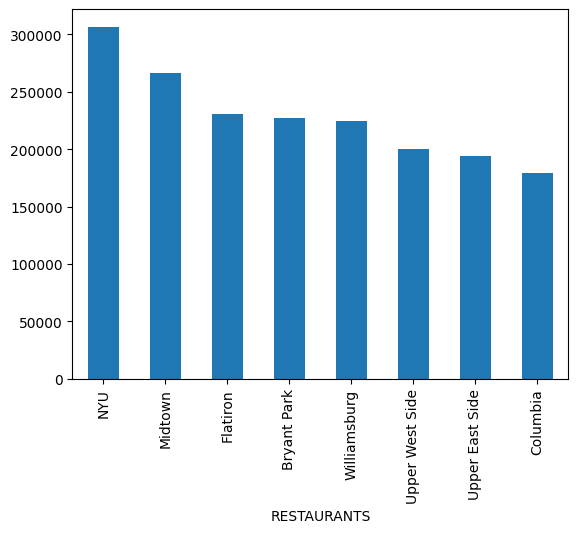

In [18]:
df_weekdays.groupby('RESTAURANTS')['NUM_ORD'].sum().sort_values(ascending=False).plot(kind='bar')

**Answer** : based on the data above, we can see that NYU has the most sales on the weekdays at 306,664.

## 4th Question : Order Type Analysis

To answer this question, we need to count every delivery at every restaurant.

In [19]:
df_orders

,ORDER_ID,DATETIME,RESTAURANT_ID,TYPE,DRINKS,COOKIES,MAIN,BASE,SIDE_1,SIDE_2
0,O1820060,2018-10-11 17:25:50,R10002,IN_STORE,1.0,2.0,NaN,NaN,NaN,NaN
1,O1011112,2018-05-31 11:35:00,R10003,IN_STORE,0.0,0.0,NaN,NaN,NaN,NaN
2,O752854,2018-04-21 18:12:57,R10001,DELIVERY,0.0,2.0,I0,I7,I15,I14
3,O2076864,2018-11-17 12:50:52,R10005,PICKUP,1.0,0.0,I0,I5,I9,I12
4,O1988898,2018-11-04 18:37:24,R10008,IN_STORE,0.0,0.0,I1,I7,I9,I9
...,...,...,...,...,...,...,...,...,...,...
2387219,O420721,2018-03-04 17:59:51,R10004,IN_STORE,0.0,2.0,I3,I5,I15,I12
2387220,O1738792,2018-09-29 13:05:36,R10007,PICKUP,0.0,0.0,I1,I5,I15,I15
2387221,O858342,2018-05-07 18:23:24,R10006,DELIVERY,0.0,0.0,I2,I6,I9,I8
2387222,O2093417,2018-11-19 19:39:56,R10006,IN_STORE,0.0,1.0,I1,I7,I10,I10


In [20]:
df_restaurants

,RESTAURANT_ID,NAME,ADDRESS,LAT,LONG,OPENING_DATE,DELIVERY_START
0,R10001,Columbia,"2884 Broadway, New York, NY 10025",40.811470,-73.961230,8/9/2014,2017-01-01
1,R10002,Midtown,"1379 6th Ave, New York, NY 10019",40.763640,-73.977960,3/19/2013,2018-05-01
2,R10005,Flatiron,"40 W 25th St, New York, NY 10010",40.743600,-73.991070,11/14/2013,2016-03-05
3,R10008,Williamsburg,"45 S 3rd St, Brooklyn, NY 11249",40.713749,-73.965782,10/12/2015,2017-01-01
4,R10004,NYU,"109 Macdougal St, New York, NY 10012",40.729930,-74.000820,1/10/2014,2017-01-01
5,R10003,Bryant Park,"70 W 40th St, New York, NY 10018",40.752911,-73.983498,5/21/2013,2018-05-01
6,R10006,Upper East Side,"1045 Lexington Ave, New York, NY 10021",40.772010,-73.960780,5/29/2014,2017-08-02
7,R10007,Upper West Side,"2140 Broadway, New York, NY 10023",40.775430,-73.982050,2/2/2015,2017-08-02


To make your analysis easier, I would like to change the `Restaurant_ID` to the name of the restaurants based on `df_restaurants`, and assign that to a new dataframe named `df_rename`.

In [21]:
df_rename = df_orders.replace({"R10001":"Columbia", "R10002":"Midtown","R10005":"Flatiron", "R10008":"Williamsburg", "R10004":"NYU", "R10003":"Bryant Park", "R10006":"Upper East Side", "R10007":"Upper West Side"})

After that, let's group the data based on the restaurant and count every portion type of delivery.

In [22]:
df_rename.groupby('RESTAURANT_ID')['TYPE'].value_counts(normalize=True)

RESTAURANT_ID    TYPE    
Bryant Park      IN_STORE    0.754002
                 PICKUP      0.177353
                 DELIVERY    0.068645
Columbia         IN_STORE    0.728053
                 PICKUP      0.171285
                 DELIVERY    0.100662
Flatiron         IN_STORE    0.725600
                 PICKUP      0.172056
                 DELIVERY    0.102343
Midtown          IN_STORE    0.753170
                 PICKUP      0.178024
                 DELIVERY    0.068805
NYU              IN_STORE    0.730706
                 PICKUP      0.168774
                 DELIVERY    0.100520
Upper East Side  IN_STORE    0.656743
                 DELIVERY    0.189381
                 PICKUP      0.153876
Upper West Side  IN_STORE    0.656462
                 DELIVERY    0.189686
                 PICKUP      0.153852
Williamsburg     IN_STORE    0.729094
                 PICKUP      0.169779
                 DELIVERY    0.101127
Name: proportion, dtype: float64

**Answer** : Based on the data above, we could conclude that delivery orders ranged from approximately 6% to approximately 18% of total orders. The least restaurant with delivery orders was Bryant Park at 6,8645%, and the most restaurants with delivery orders was Upper West Side at 18,968%.

## 5th Question : Demand Analysis for Staffing

To answer your last question, I first need to create a new column named `DAY_TYPE` to group data, whether weekday or weekend.

In [23]:
df_summarized_orders

,RESTAURANTS,DATE,NUM_ORD,PERC_DELIVERY
0,Bryant Park,2018-01-01,373,0.000000
1,Bryant Park,2018-01-02,789,0.000000
2,Bryant Park,2018-01-03,818,0.000000
3,Bryant Park,2018-01-04,782,0.000000
4,Bryant Park,2018-01-05,719,0.000000
...,...,...,...,...
2801,Williamsburg,2018-12-27,941,0.089267
2802,Williamsburg,2018-12-28,941,0.127524
2803,Williamsburg,2018-12-29,942,0.093418
2804,Williamsburg,2018-12-30,933,0.114684


In [24]:
df_summarized_orders.loc[df_summarized_orders.DATE.dt.weekday < 5, 'DAY_TYPE'] = 'WEEKDAYS'
df_summarized_orders.loc[df_summarized_orders.DATE.dt.weekday > 4, 'DAY_TYPE'] = 'WEEKENDS'
df_summarized_orders

,RESTAURANTS,DATE,NUM_ORD,PERC_DELIVERY,DAY_TYPE
0,Bryant Park,2018-01-01,373,0.000000,WEEKDAYS
1,Bryant Park,2018-01-02,789,0.000000,WEEKDAYS
2,Bryant Park,2018-01-03,818,0.000000,WEEKDAYS
3,Bryant Park,2018-01-04,782,0.000000,WEEKDAYS
4,Bryant Park,2018-01-05,719,0.000000,WEEKDAYS
...,...,...,...,...,...
2801,Williamsburg,2018-12-27,941,0.089267,WEEKDAYS
2802,Williamsburg,2018-12-28,941,0.127524,WEEKDAYS
2803,Williamsburg,2018-12-29,942,0.093418,WEEKENDS
2804,Williamsburg,2018-12-30,933,0.114684,WEEKENDS


After tagging the data based on its type of day, we need to sum every order in the given groups. 

In [25]:
df_summarized_orders.groupby(['RESTAURANTS', 'DAY_TYPE'])['NUM_ORD'].sum()

RESTAURANTS      DAY_TYPE
Bryant Park      WEEKDAYS    227445
Columbia         WEEKDAYS    178930
                 WEEKENDS     71880
Flatiron         WEEKDAYS    230495
                 WEEKENDS     51488
Midtown          WEEKDAYS    266121
                 WEEKENDS     59144
NYU              WEEKDAYS    306664
                 WEEKENDS    124196
Upper East Side  WEEKDAYS    194268
                 WEEKENDS     80733
Upper West Side  WEEKDAYS    200462
                 WEEKENDS     80724
Williamsburg     WEEKDAYS    224101
                 WEEKENDS     90573
Name: NUM_ORD, dtype: int64

Let's create a bar chart based on the given data to make analysing the data easier.

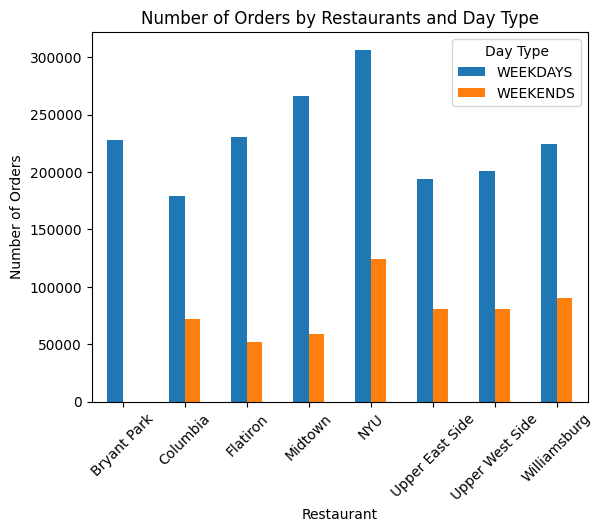

In [26]:
df_grouped = df_summarized_orders.groupby(['RESTAURANTS', 'DAY_TYPE'])['NUM_ORD'].sum().unstack()
ax = df_grouped.plot(kind='bar')
ax.set_title('Number of Orders by Restaurants and Day Type')
ax.set_ylabel('Number of Orders')
ax.set_xlabel('Restaurant')
ax.set_xticklabels(df_grouped.index, rotation=45)
ax.legend(title='Day Type')

**Answer** : based on the given data, we could see that NYU has the largest weekday and weekend orders. The second largest sales on weekdays was Flatiron, and the second largest on weekends was Williamsburg. As additional information, while Bryant Park was not operating on the weekend, its weekday sales are the fourth largest among other restaurants.